# Chronic Kidney Disease Diagnostic Tool

## Purpose
The number of individuals in the Nigerian population coming up with kidney disease has been on the rise, we there fore need a tool to help physicians and the populace to identify and early detect patients with kidney disease, for improved monitoring and resource allocation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./Chronic_Kidney_Dsease_data.csv')

In [3]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [4]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [5]:
df.Diagnosis

0       1
1       1
2       1
3       1
4       1
       ..
1654    0
1655    0
1656    0
1657    1
1658    1
Name: Diagnosis, Length: 1659, dtype: int64

In [6]:
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


In [7]:
df.shape

(1659, 54)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [10]:
df.Diagnosis.value_counts()

Diagnosis
1    1524
0     135
Name: count, dtype: int64

C:\Users\olawu\AppData\Local\Temp\ipykernel_18456\3787028851.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Diagnosis", data=df, palette="Set2")


<Axes: xlabel='Diagnosis', ylabel='count'>

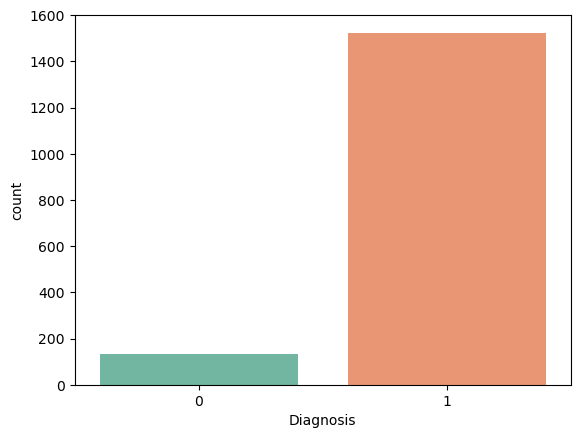

In [11]:
sns.countplot(x="Diagnosis", data=df, palette="Set2")

In [12]:
df = df.drop(columns=["DoctorInCharge", "PatientID"])

In [13]:
df

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
0,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,...,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1
1,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,...,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1
2,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,...,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1
3,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,...,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1
4,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,...,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,90,0,0,1,2,39.677059,1,1.370151,4.157954,8.602873,...,6.972093,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0
1655,34,0,0,2,1,28.922015,0,3.372073,9.647525,9.836919,...,0.465297,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0
1656,84,0,0,2,3,21.951219,0,15.825955,7.349964,5.038194,...,2.281970,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0
1657,90,0,0,2,2,24.964149,0,12.967462,0.618614,4.557577,...,0.257814,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1


In [14]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [15]:
df.isna().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [16]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
       'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity',
       'DietQuality', 'SleepQuality', 'FamilyHistoryKidneyDisease',
       'FamilyHistoryHypertension', 'FamilyHistoryDiabetes',
       'PreviousAcuteKidneyInjury', 'UrinaryTractInfections', 'SystolicBP',
       'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
       'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQuality',
       'Medi

In [17]:
categorical_features = ['Gender', 'Ethnicity', 'SocioeconomicStatus','FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections']
all_features = [col for col in df.columns if col != 'Diagnosis']
numerical_features = [col for col in all_features if col not in categorical_features]
target = df['Diagnosis']
print(f"Total features: {len(all_features)}")
print(f"Categorical features: {len(categorical_features)}")
print(f"Numerical features: {len(numerical_features)}")

Total features: 51
Categorical features: 8
Numerical features: 43


In [18]:
from sklearn.feature_selection import (
    SelectKBest, chi2, f_classif, mutual_info_classif,
    RFE, SelectFromModel, VarianceThreshold
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [19]:
def correlation_analysis(df, target_col='Diagnosis', threshold=0.1):
    """
    Analyze correlation between numerical features and target
    """
    # Calculate correlation with target
    correlations = df[numerical_features + [target_col]].corr()[target_col].abs()
    correlations = correlations.drop(target_col).sort_values(ascending=False)
    
    # Filter features above threshold
    high_corr_features = correlations[correlations > threshold].index.tolist()
    
    print(f"\nTop 10 features by correlation with {target_col}:")
    print(correlations.head(10))
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 8))
    top_features = correlations.head(15).index.tolist() + [target_col]
    correlation_matrix = df[top_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap - Top Features')
    plt.tight_layout()
    plt.show()
    
    return high_corr_features

In [20]:
def statistical_feature_selection(X, y, k=20):
    """
    Use statistical tests to select features
    """
    results = {}
    
    # For numerical features - use F-test
    if len(numerical_features) > 0:
        X_numerical = X[numerical_features]
        selector_f = SelectKBest(score_func=f_classif, k=min(k, len(numerical_features)))
        X_selected_f = selector_f.fit_transform(X_numerical, y)
        
        # Get selected feature names
        selected_features_f = X_numerical.columns[selector_f.get_support()].tolist()
        scores_f = selector_f.scores_
        
        results['f_test'] = {
            'features': selected_features_f,
            'scores': dict(zip(X_numerical.columns, scores_f))
        }
    
    # For categorical features - use Chi-square test
    if len(categorical_features) > 0:
        # Encode categorical variables
        X_categorical = X[categorical_features].copy()
        label_encoders = {}
        
        for col in categorical_features:
            le = LabelEncoder()
            X_categorical[col] = le.fit_transform(X_categorical[col].astype(str))
            label_encoders[col] = le
        
        selector_chi2 = SelectKBest(score_func=chi2, k=min(k, len(categorical_features)))
        X_selected_chi2 = selector_chi2.fit_transform(X_categorical, y)
        
        selected_features_chi2 = X_categorical.columns[selector_chi2.get_support()].tolist()
        scores_chi2 = selector_chi2.scores_
        
        results['chi2_test'] = {
            'features': selected_features_chi2,
            'scores': dict(zip(X_categorical.columns, scores_chi2)),
            'encoders': label_encoders
        }
    
    return results

In [21]:
def mutual_information_selection(X, y, k=20):
    """
    Use mutual information to select features
    """
    # Prepare data - encode categorical variables
    X_encoded = X.copy()
    label_encoders = {}
    
    for col in categorical_features:
        if col in X_encoded.columns:
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
            label_encoders[col] = le
    
    # Calculate mutual information
    mi_scores = mutual_info_classif(X_encoded, y, random_state=42)
    mi_scores_dict = dict(zip(X_encoded.columns, mi_scores))
    
    # Select top k features
    selector_mi = SelectKBest(score_func=mutual_info_classif, k=k)
    X_selected_mi = selector_mi.fit_transform(X_encoded, y)
    selected_features_mi = X_encoded.columns[selector_mi.get_support()].tolist()
    
    # Sort by score
    sorted_mi = sorted(mi_scores_dict.items(), key=lambda x: x[1], reverse=True)
    
    print(f"\nTop {k} features by Mutual Information:")
    for feature, score in sorted_mi[:k]:
        print(f"{feature}: {score:.4f}")
    
    return {
        'features': selected_features_mi,
        'scores': mi_scores_dict,
        'encoders': label_encoders
    }

In [22]:
def recursive_feature_elimination(X, y, n_features=20):
    """
    Use RFE with Random Forest to select features
    """
    # Prepare data
    X_encoded = X.copy()
    label_encoders = {}
    
    for col in categorical_features:
        if col in X_encoded.columns:
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
            label_encoders[col] = le
    
    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = X_encoded.copy()
    if numerical_features:
        X_scaled[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])
    
    # Apply RFE
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rfe = RFE(estimator=rf, n_features_to_select=n_features)
    X_rfe = rfe.fit_transform(X_scaled, y)
    
    selected_features_rfe = X_scaled.columns[rfe.support_].tolist()
    feature_rankings = dict(zip(X_scaled.columns, rfe.ranking_))
    
    print(f"\nRFE Selected Features (Top {n_features}):")
    for feature in selected_features_rfe:
        print(f"{feature}: Rank {feature_rankings[feature]}")
    
    return {
        'features': selected_features_rfe,
        'rankings': feature_rankings,
        'encoders': label_encoders,
        'scaler': scaler
    }

In [23]:
def tree_based_feature_importance(X, y, n_features=20):
    """
    Use Random Forest feature importance
    """
    # Prepare data
    X_encoded = X.copy()
    label_encoders = {}
    
    for col in categorical_features:
        if col in X_encoded.columns:
            le = LabelEncoder()
            X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
            label_encoders[col] = le
    
    # Train Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_encoded, y)
    
    # Get feature importances
    feature_importance = dict(zip(X_encoded.columns, rf.feature_importances_))
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    
    # Select top features
    selected_features_rf = [feature for feature, _ in sorted_importance[:n_features]]
    
    print(f"\nTop {n_features} features by Random Forest Importance:")
    for feature, importance in sorted_importance[:n_features]:
        print(f"{feature}: {importance:.4f}")
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    features, importances = zip(*sorted_importance[:15])
    plt.barh(range(len(features)), importances)
    plt.yticks(range(len(features)), features)
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    return {
        'features': selected_features_rf,
        'importances': feature_importance,
        'encoders': label_encoders
    }

In [24]:
def variance_threshold_selection(X, threshold=0.01):
    """
    Remove features with low variance
    """
    # Only apply to numerical features
    if len(numerical_features) > 0:
        X_numerical = X[numerical_features]
        
        # Apply variance threshold
        selector = VarianceThreshold(threshold=threshold)
        X_selected = selector.fit_transform(X_numerical)
        
        # Get selected feature names
        selected_features = X_numerical.columns[selector.get_support()].tolist()
        
        # Calculate variances
        variances = dict(zip(X_numerical.columns, selector.variances_))
        
        print(f"\nFeatures removed due to low variance (threshold={threshold}):")
        removed_features = [col for col in numerical_features if col not in selected_features]
        for feature in removed_features:
            print(f"{feature}: variance = {variances[feature]:.6f}")
        
        return selected_features
    
    return numerical_features

In [25]:
def comprehensive_feature_selection(df, target_col='Diagnosis', n_features=20):
    """
    Combine multiple feature selection methods
    """
    print("=" * 60)
    print("COMPREHENSIVE FEATURE SELECTION PIPELINE")
    print("=" * 60)
    
    # Prepare data
    X = df.drop(columns=[target_col])
    y = df[target_col]
    
    # Encode target if it's categorical
    if y.dtype == 'object':
        le_target = LabelEncoder()
        y = le_target.fit_transform(y)
    
    results = {}
    
    # 1. Correlation Analysis
    print("\n1. CORRELATION ANALYSIS")
    print("-" * 30)
    high_corr_features = correlation_analysis(df, target_col)
    results['correlation'] = high_corr_features
    
    # 2. Statistical Tests
    print("\n2. STATISTICAL TESTS")
    print("-" * 30)
    statistical_results = statistical_feature_selection(X, y, k=n_features)
    print('\nStatistical results', statistical_results)
    results['statistical'] = statistical_results
    
    # 3. Mutual Information
    print("\n3. MUTUAL INFORMATION")
    print("-" * 30)
    mi_results = mutual_information_selection(X, y, k=n_features)
    results['mutual_info'] = mi_results
    
    # 4. Recursive Feature Elimination
    print("\n4. RECURSIVE FEATURE ELIMINATION")
    print("-" * 30)
    rfe_results = recursive_feature_elimination(X, y, n_features=n_features)
    results['rfe'] = rfe_results
    
    # 5. Tree-based Feature Importance
    print("\n5. TREE-BASED FEATURE IMPORTANCE")
    print("-" * 30)
    rf_results = tree_based_feature_importance(X, y, n_features=n_features)
    results['random_forest'] = rf_results
    
    # 6. Variance Threshold
    print("\n6. VARIANCE THRESHOLD")
    print("-" * 30)
    variance_features = variance_threshold_selection(X)
    results['variance_threshold'] = variance_features
    
    # 7. Consensus Features (appearing in multiple methods)
    print("\n7. CONSENSUS FEATURES")
    print("-" * 30)
    all_selected_features = []
    
    # Collect features from each method
    if 'correlation' in results:
        all_selected_features.extend(results['correlation'])
    
    if 'statistical' in results:
        if 'f_test' in results['statistical']:
            all_selected_features.extend(results['statistical']['f_test']['features'])
        if 'chi2_test' in results['statistical']:
            all_selected_features.extend(results['statistical']['chi2_test']['features'])
    
    all_selected_features.extend(results['mutual_info']['features'])
    all_selected_features.extend(results['rfe']['features'])
    all_selected_features.extend(results['random_forest']['features'])
    
    # Count frequency of each feature
    feature_counts = {}
    for feature in all_selected_features:
        feature_counts[feature] = feature_counts.get(feature, 0) + 1
    
    # Sort by frequency
    consensus_features = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
    
    print("Features selected by multiple methods:")
    for feature, count in consensus_features:
        print(f"{feature}: selected by {count} methods")
    
    # Final recommendation
    final_features = [feature for feature, count in consensus_features if count >= 2][:n_features]
    
    print(f"\nFINAL RECOMMENDED FEATURES (top {len(final_features)}):")
    print("-" * 50)
    for i, feature in enumerate(final_features, 1):
        print(f"{i:2d}. {feature}")
    
    return {
        'all_results': results,
        'consensus_features': consensus_features,
        'final_features': final_features
    }

COMPREHENSIVE FEATURE SELECTION PIPELINE

1. CORRELATION ANALYSIS
------------------------------

Top 10 features by correlation with Diagnosis:
SerumCreatinine      0.201125
GFR                  0.175988
Itching              0.100652
FastingBloodSugar    0.095694
MuscleCramps         0.094811
BUNLevels            0.093097
ProteinInUrine       0.090014
SystolicBP           0.083528
HbA1c                0.059999
BMI                  0.055222
Name: Diagnosis, dtype: float64


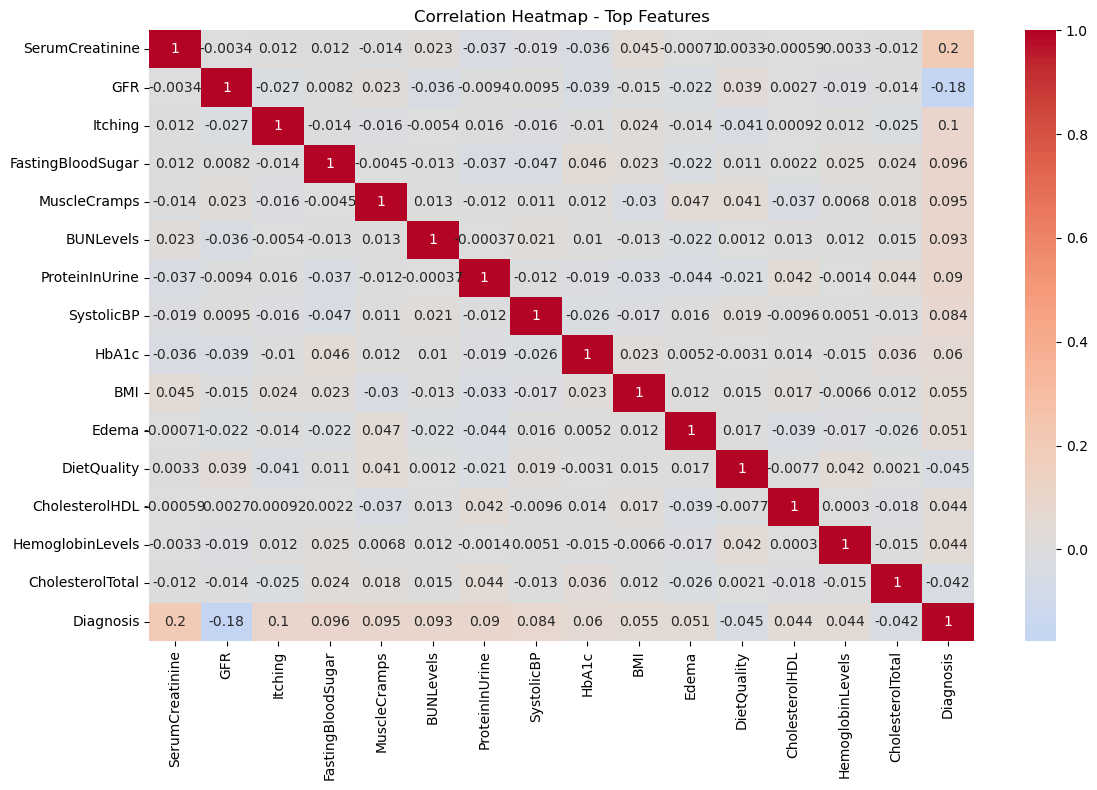


2. STATISTICAL TESTS
------------------------------

Statistical results {'f_test': {'features': ['FastingBloodSugar', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'MuscleCramps', 'Itching'], 'scores': {'Age': 0.0014002613567692228, 'EducationLevel': 2.3139209204593976, 'BMI': 5.0684444395372195, 'Smoking': 1.197668157810769, 'AlcoholConsumption': 0.06463144798032545, 'PhysicalActivity': 0.769855129126335, 'DietQuality': 3.2882442435443733, 'SleepQuality': 0.7504711699885924, 'SystolicBP': 11.642035576023204, 'DiastolicBP': 2.196366945324059, 'FastingBloodSugar': 15.314090042099828, 'HbA1c': 5.9866313196180485, 'SerumCreatinine': 69.85309569454118, 'BUNLevels': 14.486844091252891, 'GFR': 52.96031823264878, 'ProteinInUrine': 13.53563819344695, 'ACR': 0.0039767202470743, 'SerumElectrolytesSodium': 1.7382179992555917, 'SerumElectrolytesPotassium': 0.9301795208715976, 'SerumElectrolytesCalcium': 0.07297283858030375, 'SerumElectrolytesPhosphorus': 0.2130187025385792, 'Hemoglobi

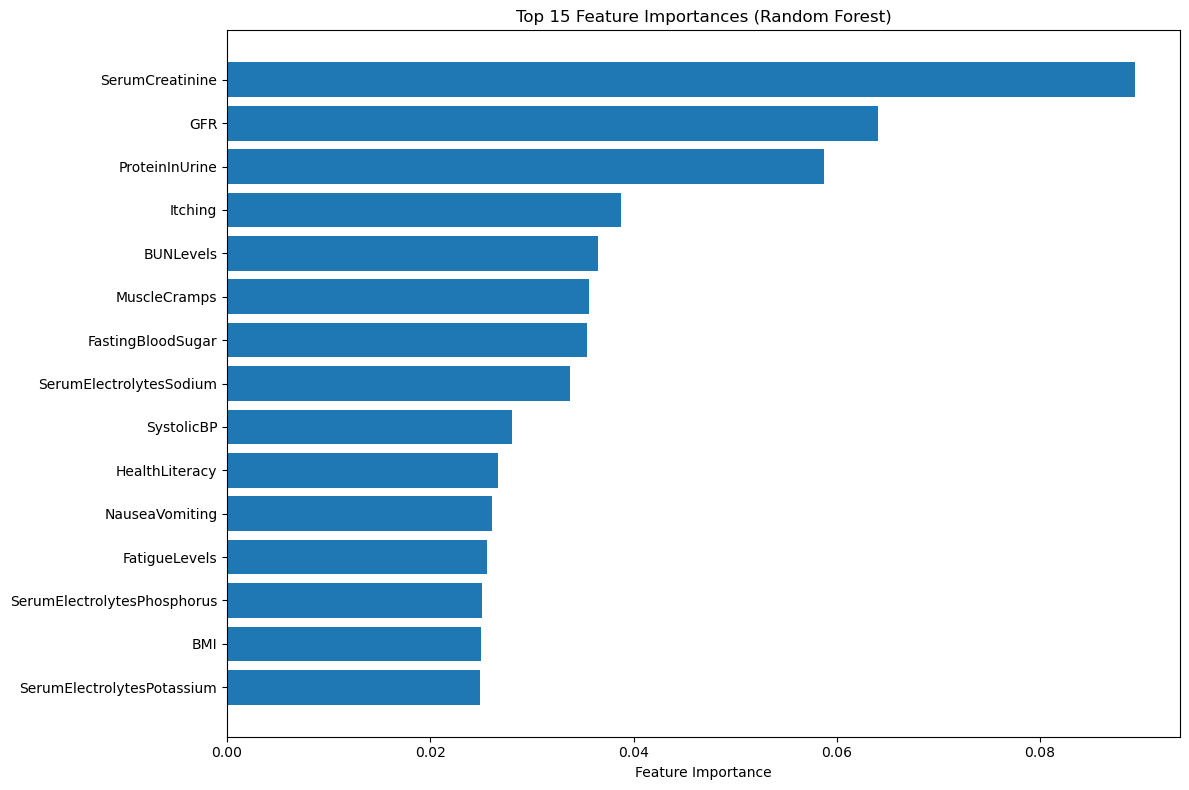


6. VARIANCE THRESHOLD
------------------------------

Features removed due to low variance (threshold=0.01):

7. CONSENSUS FEATURES
------------------------------
Features selected by multiple methods:
SerumCreatinine: selected by 5 methods
GFR: selected by 5 methods
Itching: selected by 4 methods
FastingBloodSugar: selected by 4 methods
ProteinInUrine: selected by 4 methods
BUNLevels: selected by 3 methods
MuscleCramps: selected by 3 methods
Gender: selected by 1 methods
Ethnicity: selected by 1 methods
SocioeconomicStatus: selected by 1 methods
FamilyHistoryKidneyDisease: selected by 1 methods
FamilyHistoryHypertension: selected by 1 methods
FamilyHistoryDiabetes: selected by 1 methods
UrinaryTractInfections: selected by 1 methods
PhysicalActivity: selected by 1 methods
SystolicBP: selected by 1 methods
NSAIDsUse: selected by 1 methods

FINAL RECOMMENDED FEATURES (top 7):
--------------------------------------------------
 1. SerumCreatinine
 2. GFR
 3. Itching
 4. FastingBloodSugar

In [26]:
feature_selection_results = comprehensive_feature_selection(df, target_col='Diagnosis', n_features=7)

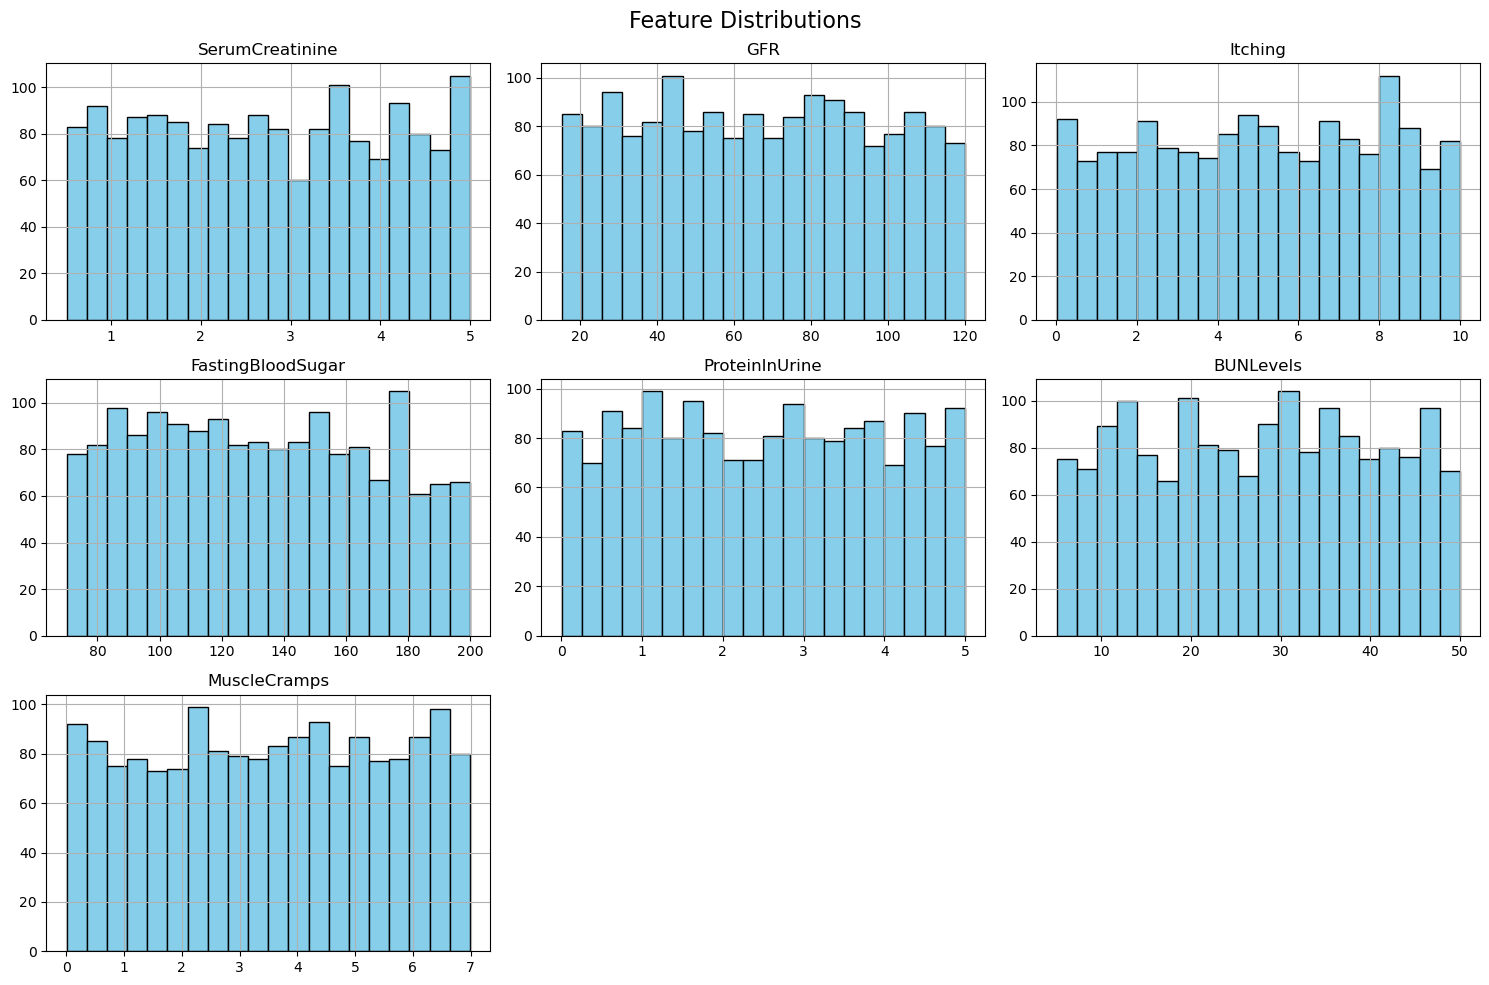

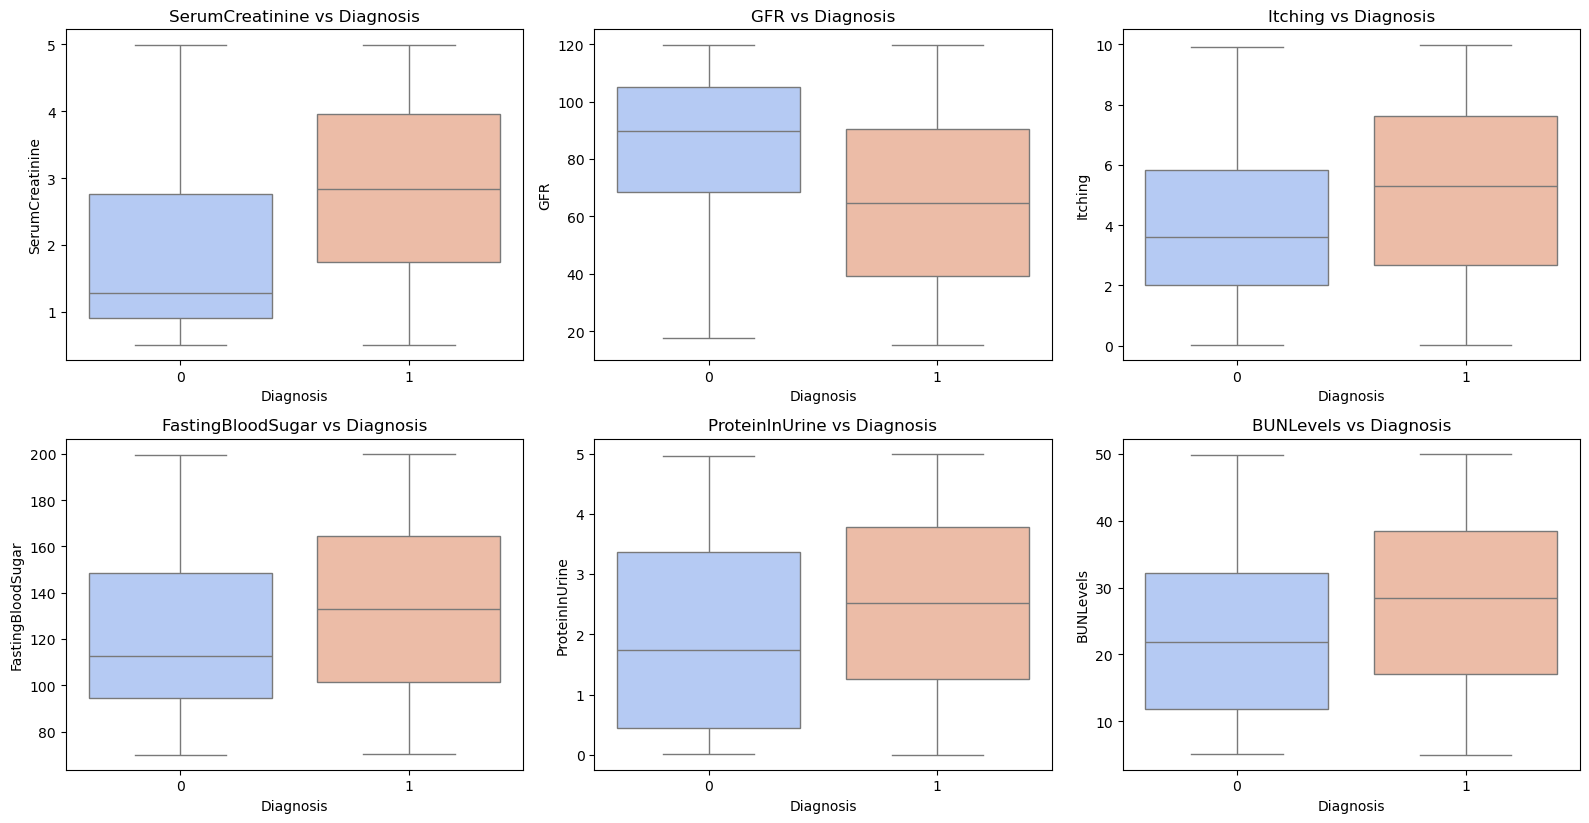

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df[feature_selection_results['final_features']]
X.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()
plt.figure(figsize=(16, 12))
for idx, col in enumerate(X.columns[:-1], 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(x='Diagnosis', y=col, data=df, palette='coolwarm', hue="Diagnosis", legend=False)
    plt.title(f'{col} vs Diagnosis')
    plt.tight_layout()
plt.show()
y = df['Diagnosis']
x_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4, stratify=y)

In [28]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [29]:
pred = model.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Acuracy Score:", accuracy_score(y_test, pred))
print("\nClassification Report:\n", classification_report(y_test, pred))

Acuracy Score: 0.9216867469879518

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.09      0.16        54
           1       0.93      1.00      0.96       610

    accuracy                           0.92       664
   macro avg       0.78      0.54      0.56       664
weighted avg       0.90      0.92      0.89       664



Confusion matrix for logistrics regression model
 [[  5  49]
 [  3 607]]


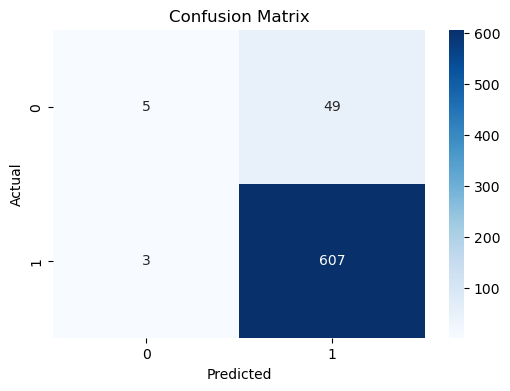

In [31]:
conf_mat_log_reg = confusion_matrix(y_test, pred)
print('Confusion matrix for logistrics regression model\n', conf_mat_log_reg )

plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
r_model = RandomForestClassifier(random_state=42)
r_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
pred2 = r_model.predict(X_test)

In [34]:
print("Acuracy Score: Random Forest", accuracy_score(y_test, pred2))
print("\nClassification Report:\n", classification_report(y_test, pred2))

Acuracy Score: Random Forest 0.9262048192771084

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.19      0.29        54
           1       0.93      0.99      0.96       610

    accuracy                           0.93       664
   macro avg       0.80      0.59      0.63       664
weighted avg       0.91      0.93      0.91       664



Confusion Matrix for Random Forest Classifier
 [[ 10  44]
 [  5 605]]


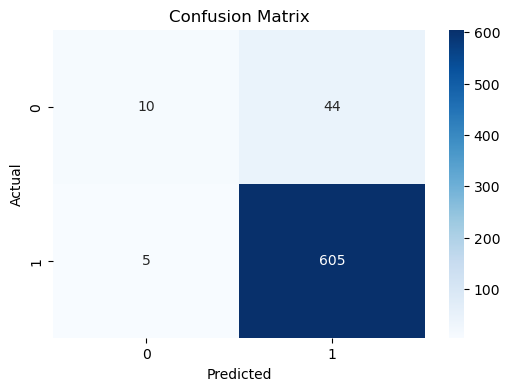

In [35]:
conf_mat_rand_for = confusion_matrix(y_test, pred2)
print("Confusion Matrix for Random Forest Classifier\n", conf_mat_rand_for)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_rand_for, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [36]:
from xgboost import XGBClassifier

In [37]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("\n⚡ XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))


⚡ XGBoost
Accuracy: 0.9216867469879518
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.28      0.37        54
           1       0.94      0.98      0.96       610

    accuracy                           0.92       664
   macro avg       0.74      0.63      0.66       664
weighted avg       0.91      0.92      0.91       664



c:\Users\olawu\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:24:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix for XG boost
 [[ 15  39]
 [ 13 597]]


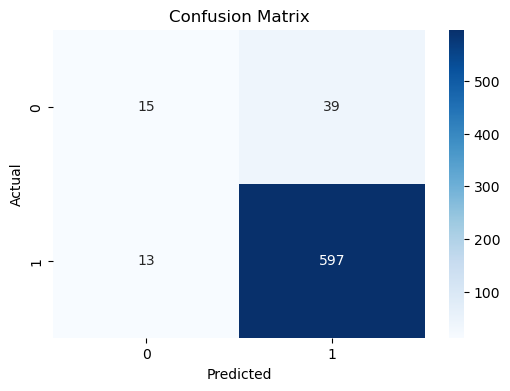

In [38]:
conf_mat_xg = confusion_matrix(y_test, xgb_pred)
print("Confusion Matrix for XG boost\n", conf_mat_xg)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_xg, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
# --- Evaluation Reports ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred))
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, pred2))
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("\nLogistic Regression Report:\n", classification_report(y_test, pred))
print("\nRandom Forest Report:\n", classification_report(y_test, pred2))
print("\nXGBoost Report:\n", classification_report(y_test, xgb_pred))


Logistic Regression Accuracy: 0.9216867469879518
Random Forest Classifier Accuracy: 0.9262048192771084
XGBoost Accuracy: 0.9216867469879518

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.62      0.09      0.16        54
           1       0.93      1.00      0.96       610

    accuracy                           0.92       664
   macro avg       0.78      0.54      0.56       664
weighted avg       0.90      0.92      0.89       664


Random Forest Report:
               precision    recall  f1-score   support

           0       0.67      0.19      0.29        54
           1       0.93      0.99      0.96       610

    accuracy                           0.93       664
   macro avg       0.80      0.59      0.63       664
weighted avg       0.91      0.93      0.91       664


XGBoost Report:
               precision    recall  f1-score   support

           0       0.54      0.28      0.37        54
           1       0.94  

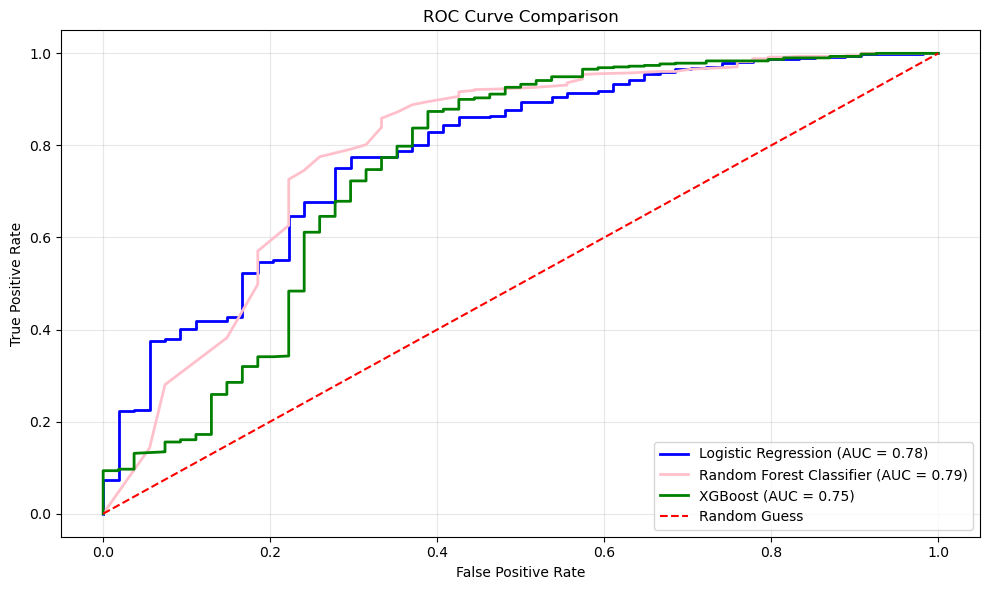

In [40]:
from sklearn.metrics import roc_curve, auc

# --- ROC Curve & AUC ---
log_proba = model.predict_proba(X_test)[:, 1]
rf_proba =r_model.predict_proba(X_test)[:, 1]
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, log_proba)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
auc_log = auc(fpr_log, tpr_log)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label=f'Random Forest Classifier (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [41]:
import joblib

# I will use the Random Forest Classifier as it has beter AUC score
joblib.dump(r_model, "rfc_ckd_model.pkl")

['rfc_ckd_model.pkl']